# Crop Recommendation System - Exploratory Data Analysis

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings as warn
warn.filterwarnings("ignore")

In [2]:
# loading dataset
df=pd.read_csv("Crop_recommendation.csv")
df

N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

In [3]:
# checking data types of all attributes
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [4]:
# counting number of samples for each crop
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [5]:
# checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
# removing duplicate samples from data
df.drop_duplicates(inplace=True)

In [7]:
# no null values are found
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
# no null values are found
df.notnull().sum()

N              2200
P              2200
K              2200
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label          2200
dtype: int64

In [9]:
# checking first 2 samples
df.head(2)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice

In [10]:
# understanding statistical description of dataset 
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [11]:
# column names
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
# crop names
unique_crops=df['label'].unique()
unique_crops,len(unique_crops)

(array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
        'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
        'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
        'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
       dtype=object),
 22)

In [13]:
# creating indices for each crop name
unique_crop_vals=[i for i in range(len(unique_crops))]
unique_crop_vals

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [14]:
# mapping crop names with indices
df['label'].replace(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
                   unique_crop_vals,inplace=True)

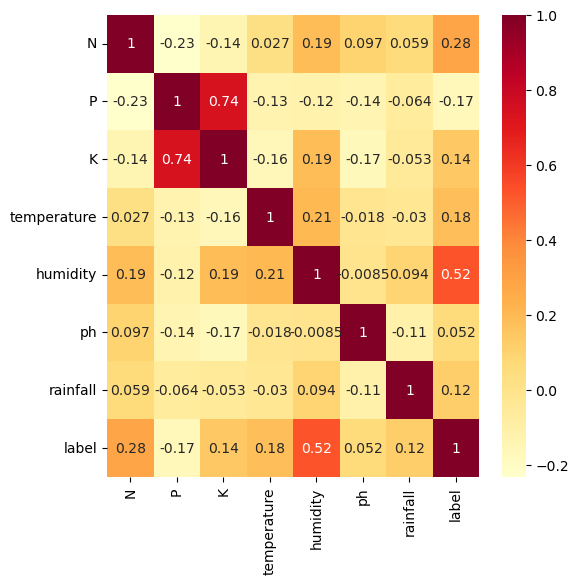

In [16]:
# visualizing linear relationship among input and output using correlation heatmap
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap="YlOrRd")
plt.show()

In [17]:
# columns
cols=df.columns
cols

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

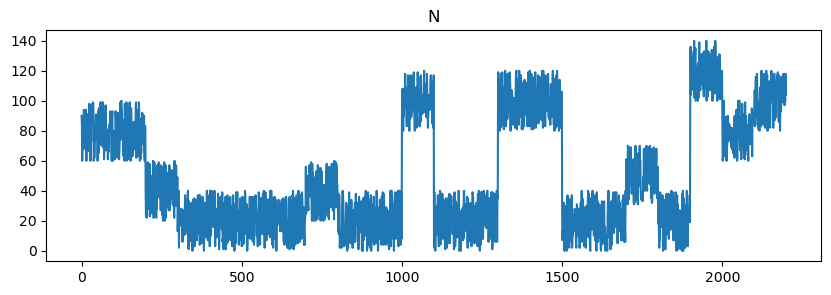

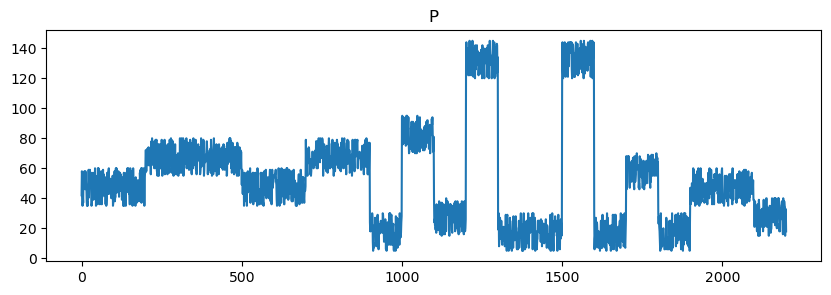

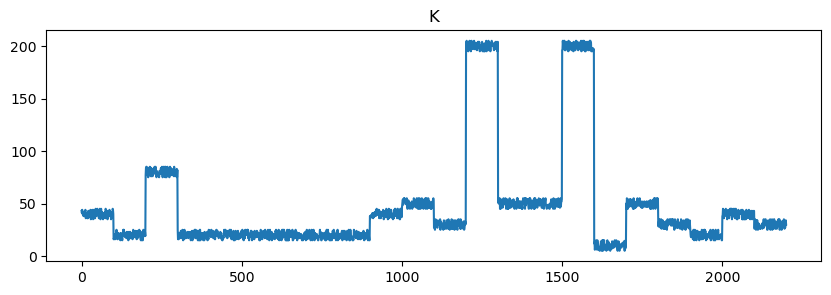

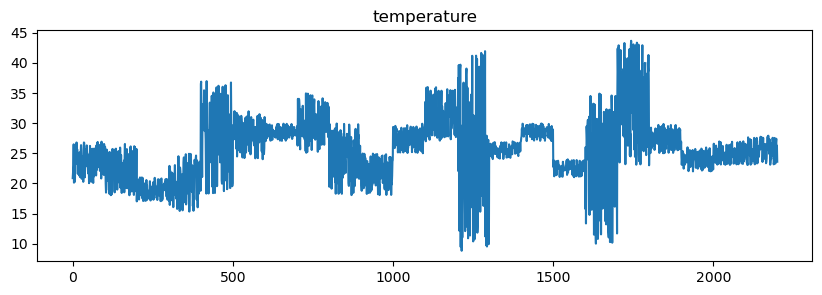

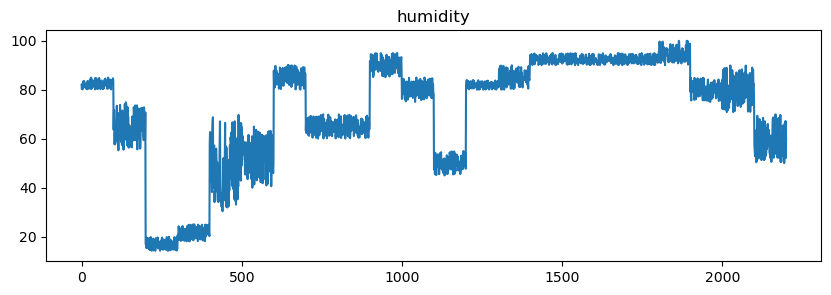

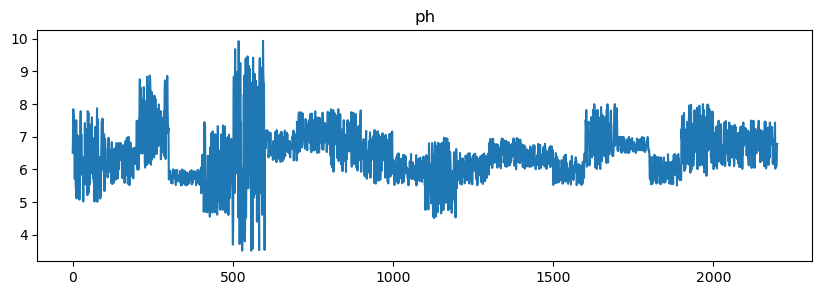

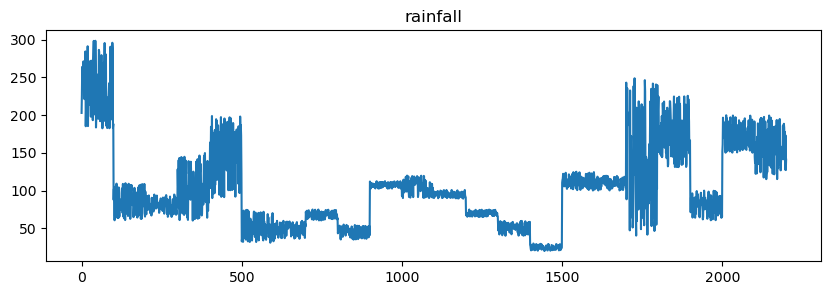

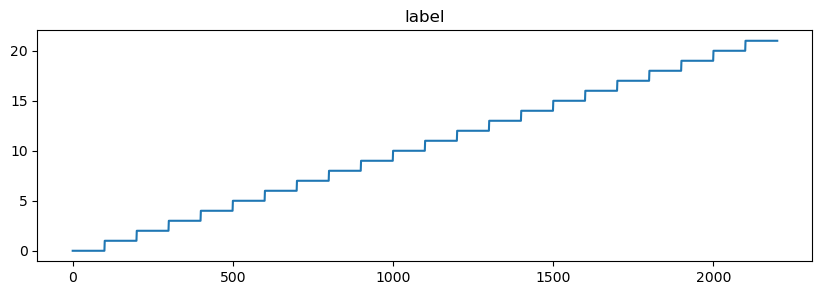

In [18]:
# line plots for all input and output features
for column in cols:
    plt.figure(figsize=(10,3))
    plt.plot(range(df.shape[0]),df[column])
    plt.title(column)
    plt.show()

In [19]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

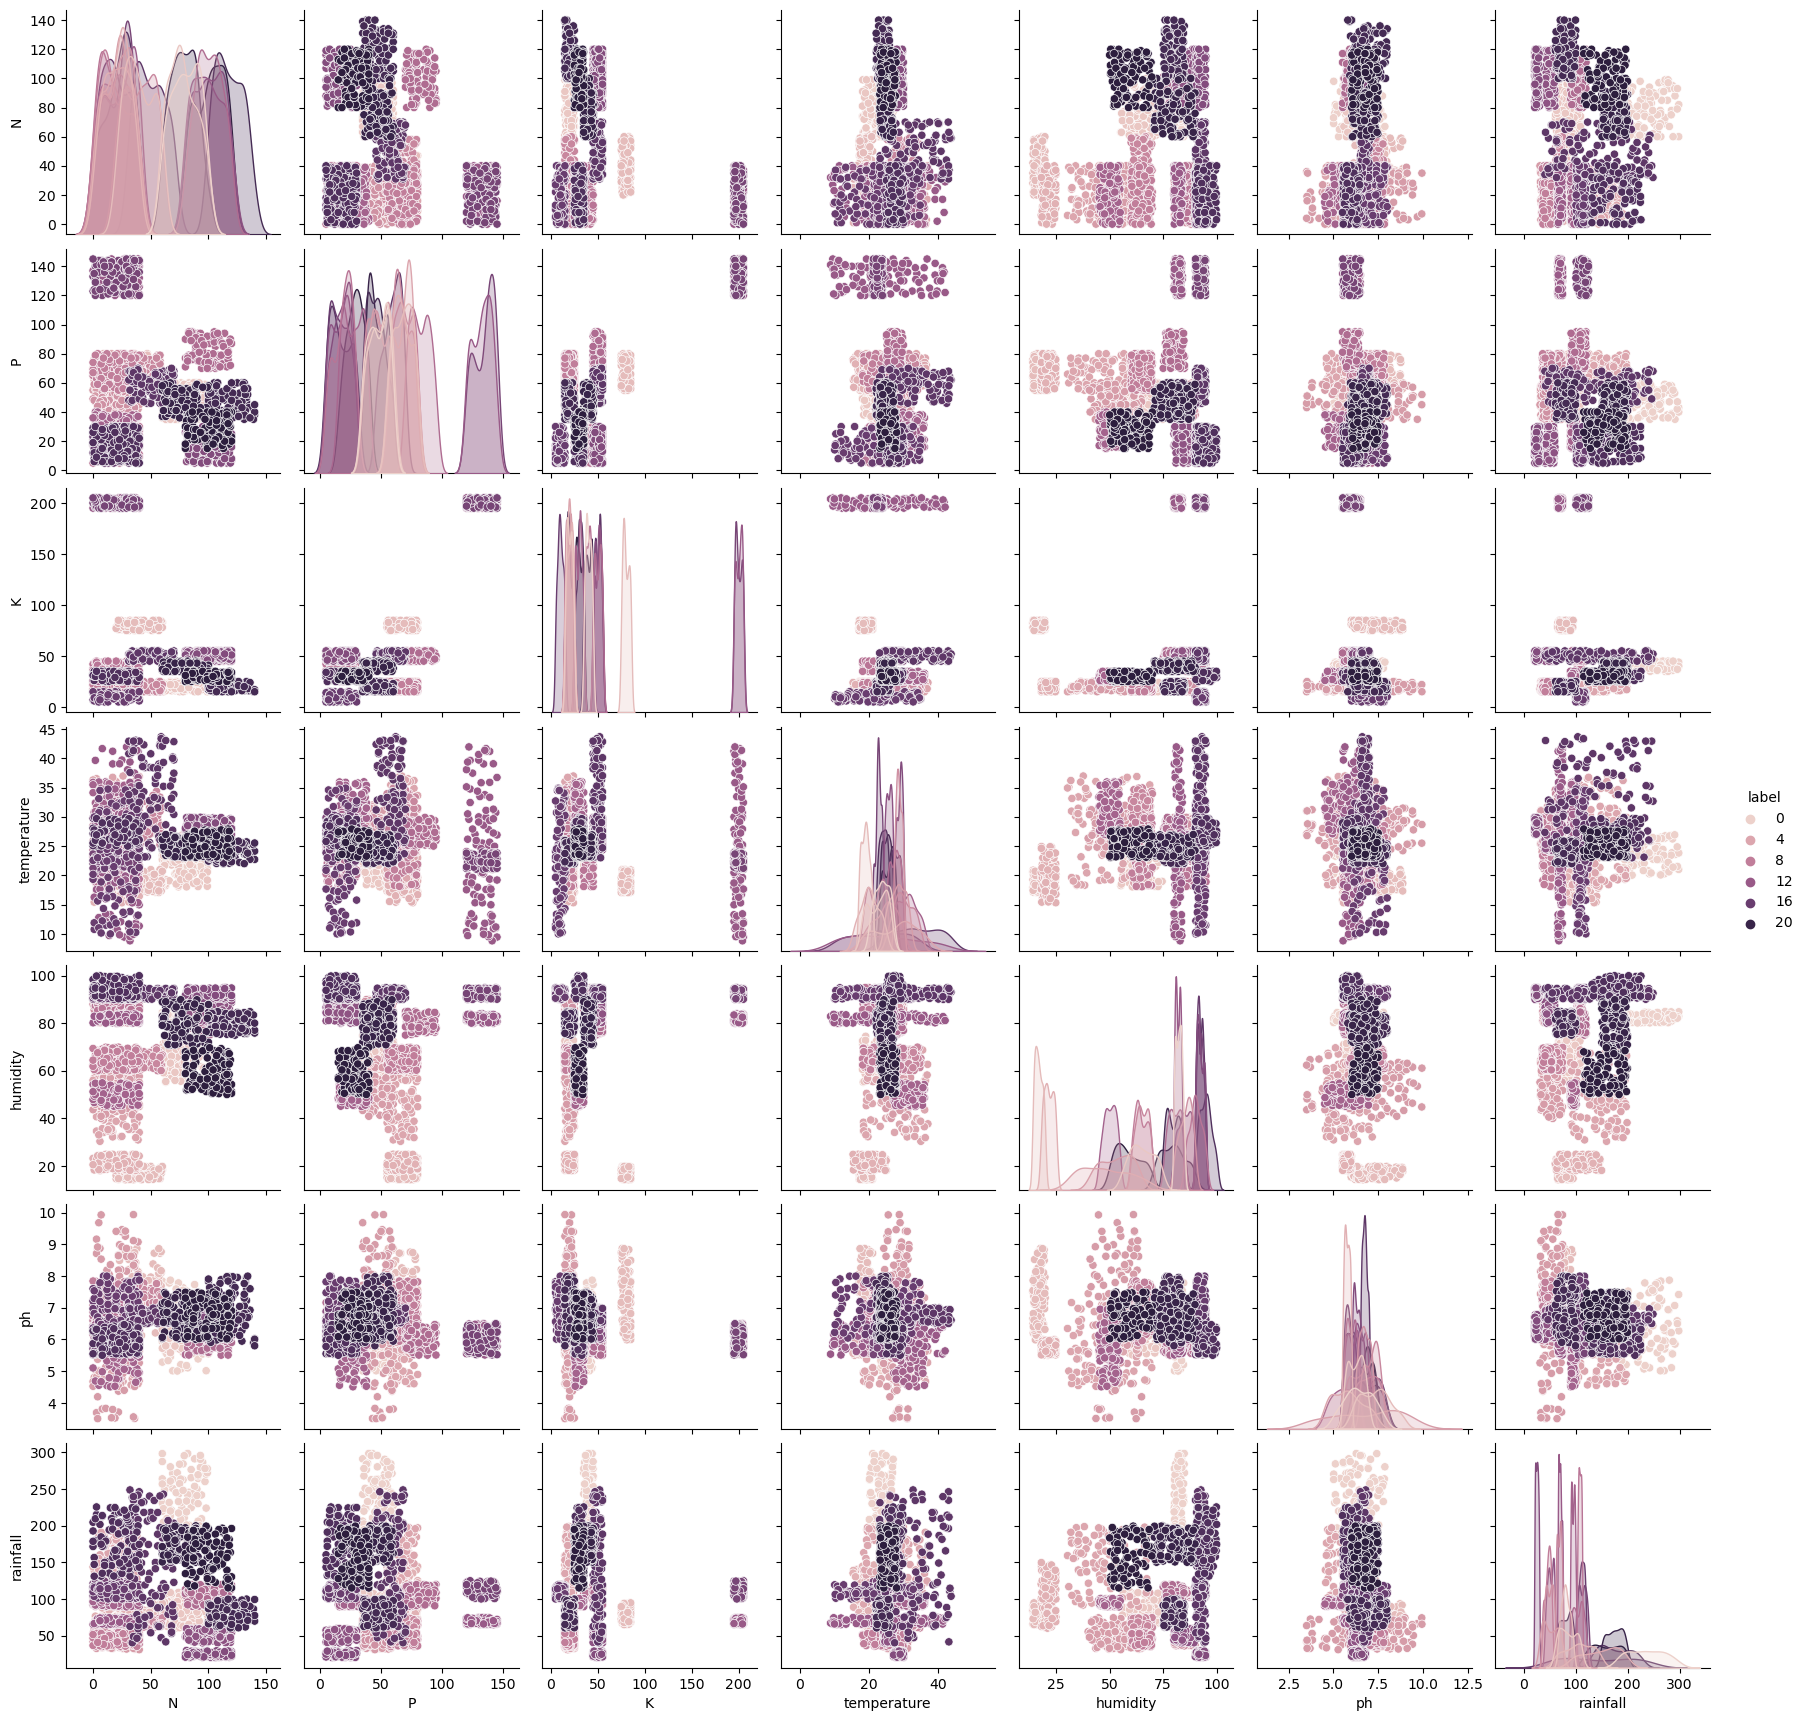

In [20]:
# pairplot visualization
sns.pairplot(df,hue='label')

In [22]:
# mapping crop names with numbers
df['label'].replace(unique_crop_vals,unique_crops,inplace=True)

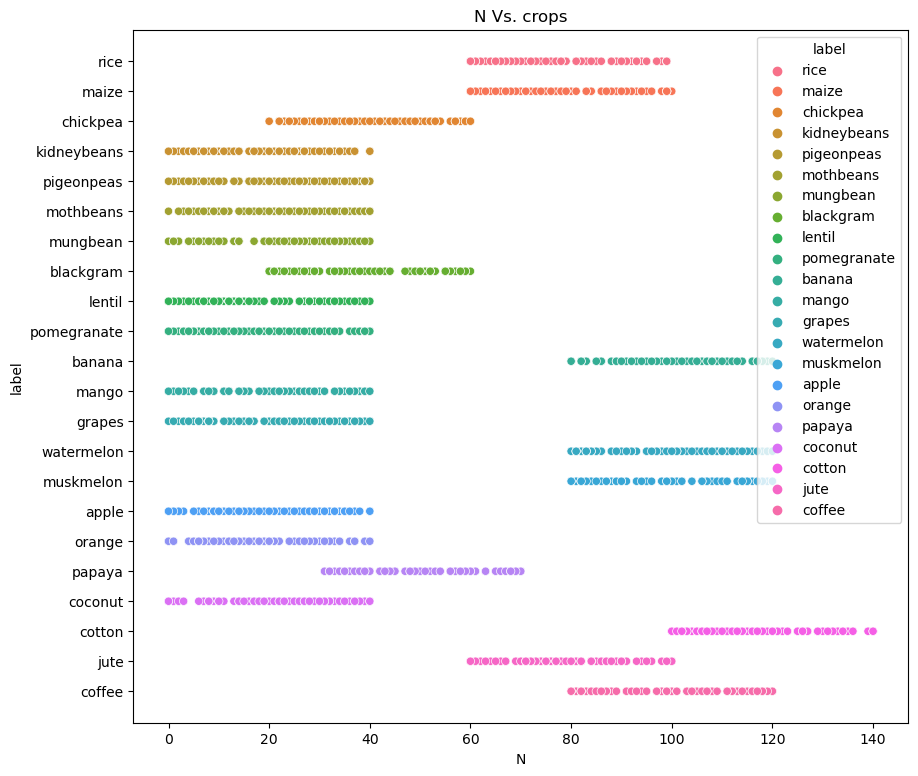

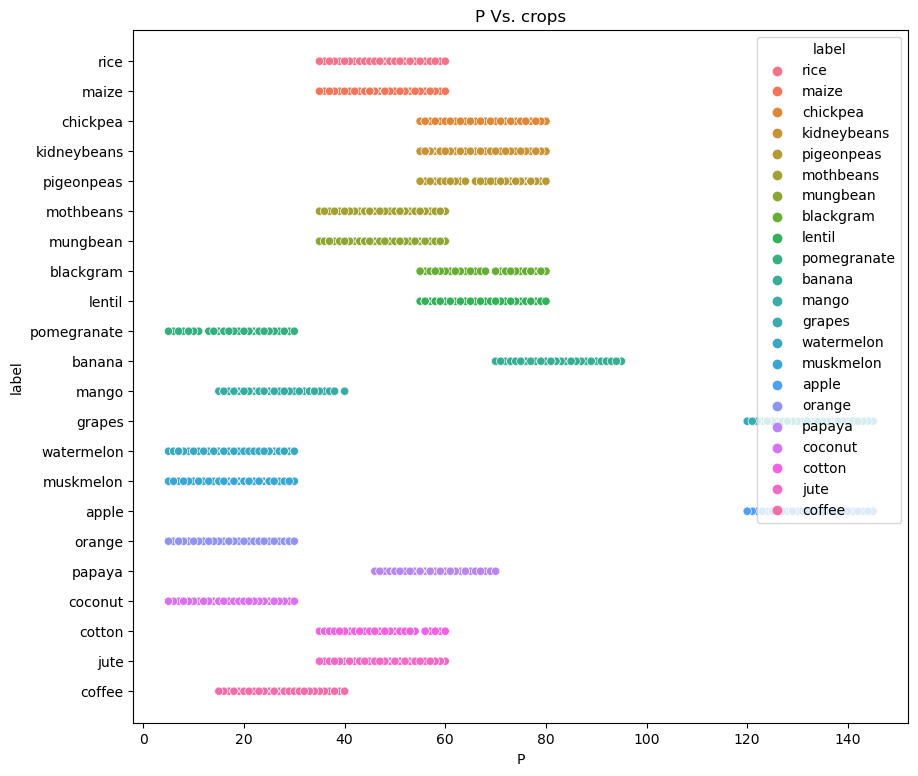

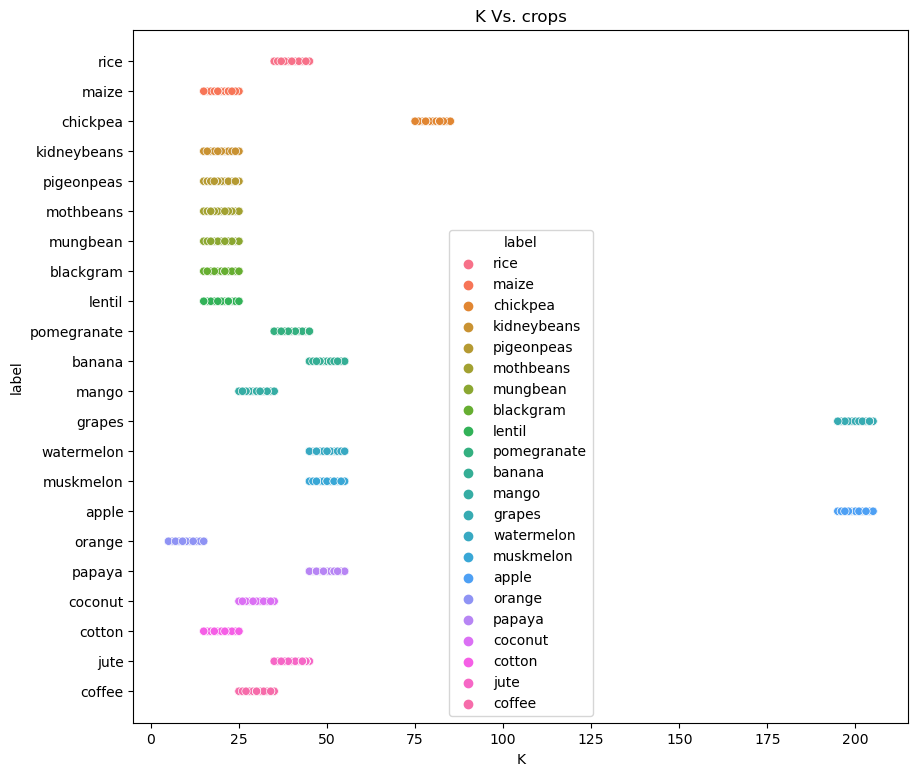

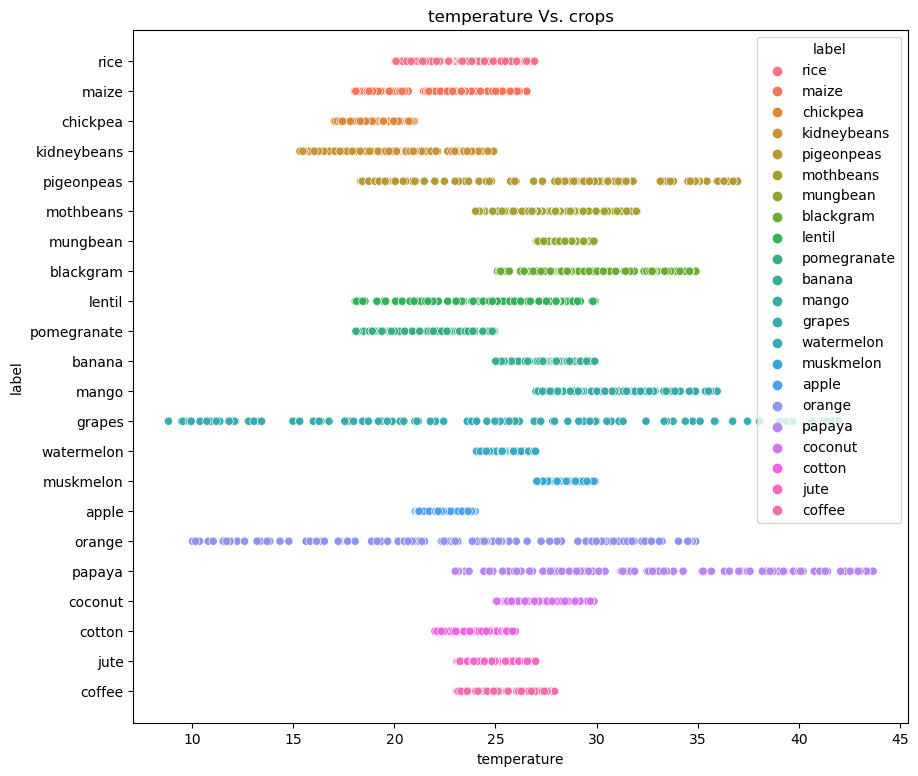

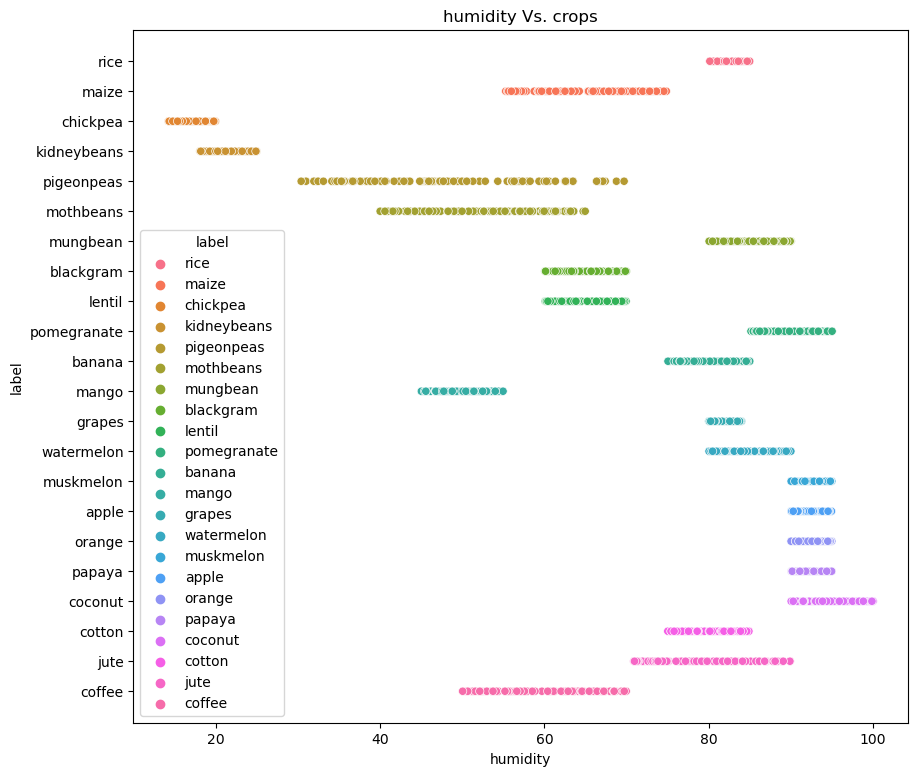

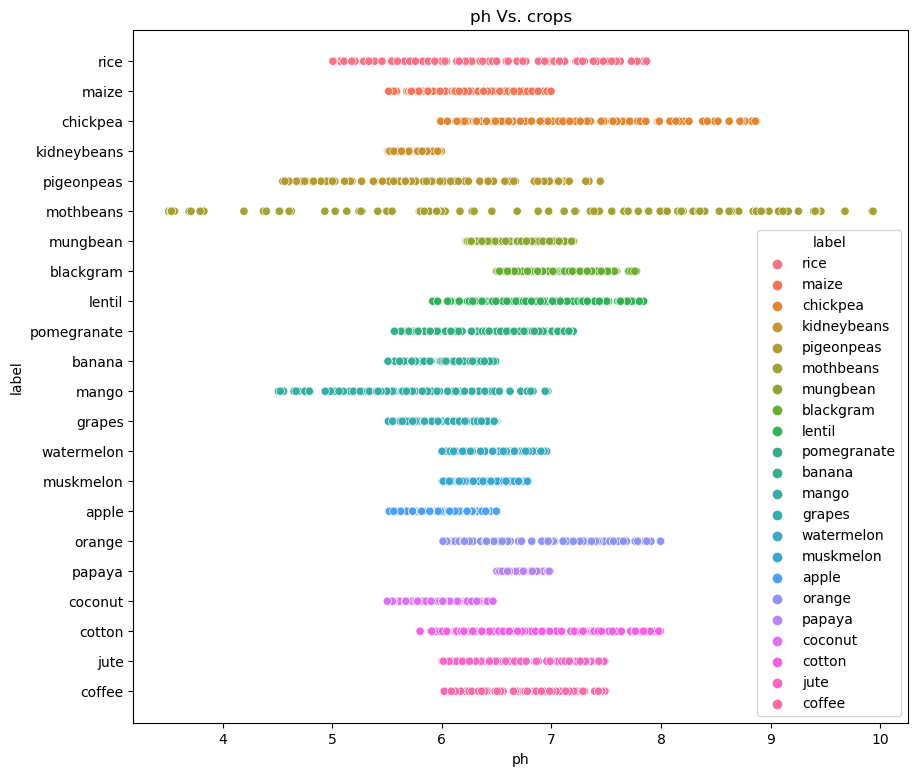

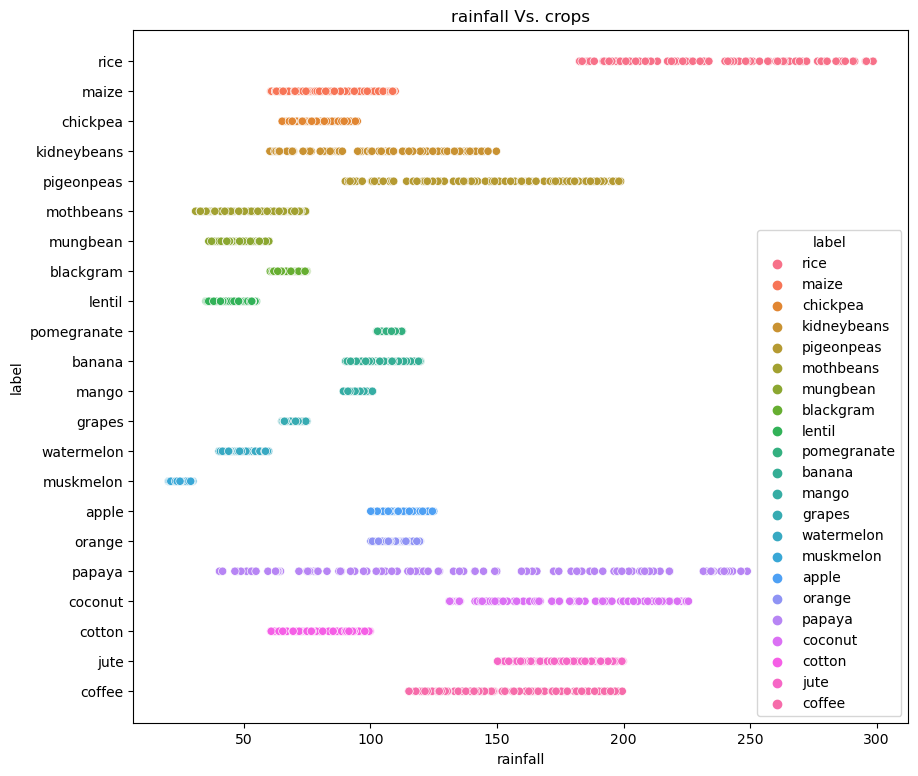

In [25]:
# scatterplot visualization for all input and output features
for i in range(len(cols)-1):
    plt.figure(figsize=(10,9))
    plt.title(str(cols[i])+" Vs. crops")
    sns.scatterplot(data=df,x=cols[i],y='label',hue="label")
    plt.show()

In [4]:
# 3D scatterplot visualizations
px.scatter_3d(df,x="N",y="P",z="K",color="label")

In [5]:
# 3D scatterplot visualizations
px.scatter_3d(df,x="N",y="P",z="temperature",color="label")

In [6]:
# 3D scatterplot visualizations
px.scatter_3d(df,x="temperature",y="humidity",z="rainfall",color="label")

In [7]:
# 3D scatterplot visualization
px.scatter_3d(df,x="humidity",y="N",z="temperature",color="label")

<AxesSubplot:>

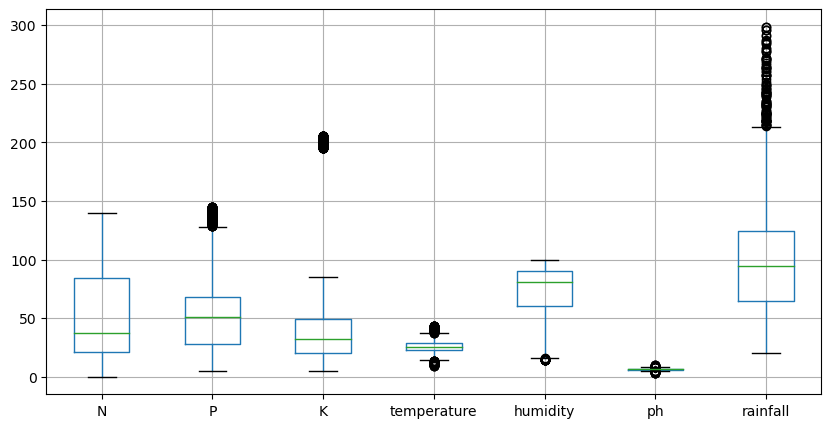

In [32]:
# boxplot visualization
plt.figure(figsize=(10,5))
df.boxplot()

In [33]:
print("Total crops under study are :-")
df['label'].unique()

Total crops under study are :-


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

##### Crop-wise mean comparision for each feature

In [34]:
comp_df=pd.DataFrame({})

In [35]:
ind=[]

for value,frame in df.groupby("label"):
    ind.append(value)
    mean_val=pd.DataFrame(frame.mean()).T
    comp_df=pd.concat([comp_df,mean_val])
    
comp_df['label']=ind
comp_df

N       P       K  temperature   humidity        ph    rainfall  \
0   20.80  134.22  199.89    22.630942  92.333383  5.929663  112.654779   
0  100.23   82.01   50.05    27.376798  80.358123  5.983893  104.626980   
0   40.02   67.47   19.24    29.973340  65.118426  7.133952   67.884151   
0   40.09   67.79   79.92    18.872847  16.860439  7.336957   80.058977   
0   21.98   16.93   30.59    27.409892  94.844272  5.976562  175.686646   
0  101.20   28.74   29.94    25.540477  58.869846  6.790308  158.066295   
0  117.77   46.24   19.56    23.988958  79.843474  6.912675   80.398043   
0   23.18  132.53  200.11    23.849575  81.875228  6.025937   69.611829   
0   78.40   46.86   39.99    24.958376  79.639864  6.732778  174.792798   
0   20.75   67.54   20.05    20.115085  21.605357  5.749411  105.919778   
0   18.77   68.36   19.41    24.509052  64.804785  6.927932   45.680454   
0   77.76   48.44   19.79    22.389204  65.092249  6.245190   84.766988   
0   20.07   27.18   29.92    31.208770  50.156573  5.766373   94.704515   
0   21.44   48.01   20.23    28.194920  53.160418  6.831174   51.198487   
0   20.99   47.28   19.87    28.525775  85.499975  6.723957   48.403601   
0  100.32   17.72   50.08    28.663066  92.342802  6.358805   24.689952   
0   19.58   16.55   10.01    22.765725  92.170209  7.016957  110.474969   
0   49.88   59.05   50.04    33.723859  92.403388  6.741442  142.627839   
0   20.73   67.73   20.29    27.741762  48.061633  5.794175  149.457564   
0   18.87   18.75   40.21    21.837842  90.125504  6.429172  107.528442   
0   79.89   47.58   39.87    23.689332  82.272822  6.425471  236.181114   
0   99.42   17.00   50.22    25.591767  85.160375  6.495778   50.786219   

         label  
0        apple  
0       banana  
0    blackgram  
0     chickpea  
0      coconut  
0       coffee  
0       cotton  
0       grapes  
0         jute  
0  kidneybeans  
0       lentil  
0        maize  
0        mango  
0    mothbeans  
0     mungbean  
0    muskmelon  
0       orange  
0       papaya  
0   pigeonpeas  
0  pomegranate  
0         rice  
0   watermelon

In [62]:
# iqrplot to visualize statistical distribution of data
def iqrplot(data_frame,y):
    
    data=[]
    ind=[]
    
    for crop, frame in data_frame.groupby("label"):
        
        ind.append(crop)
        
        q1=np.quantile(frame[y],0.25)
        q2=np.quantile(frame[y],0.50)
        q3=np.quantile(frame[y],0.75)
        
        iqr=q3-q1
        
        min_whisker=q1-1.5*iqr
        max_whisker=q3+1.5*iqr
        
        row=[]
        
        if(min_whisker<min(frame[y])):
            min_whisker=min(frame[y])
        
        if(max_whisker>max(frame[y])):
            max_whisker=max(frame[y])
            
        row.append(min_whisker)
        row.append(q1)
        row.append(q2)
        row.append(q3)
        row.append(max_whisker)
        
        data.append(row)
    
    data_frame=pd.DataFrame(data,columns=["min_whisker",'q1','q2','q3',"max_whisker"])
    
    data_frame['label']=ind
    
    data_frame.sort_values(by='q2',inplace=True)
    
    plt.figure(figsize=(8,3))
    
    plt.title("iqrplot for "+str(y))
    
    plt.plot(range(len(data_frame)),data_frame['max_whisker'],color='green',linewidth=0.3,alpha=1,label="Max")
    
    plt.plot(range(len(data_frame)),data_frame['q3'],color='brown',linewidth=0.2,alpha=1,label="Q3")
    
    plt.plot(range(len(data_frame)),data_frame['q2'],color='white',linewidth=0.6,alpha=1,label="Q2")
    
    plt.plot(range(len(data_frame)),data_frame['q1'],color='brown',linewidth=0.2,alpha=1,label="Q1")
    
    plt.plot(range(len(data_frame)),data_frame['min_whisker'],color='green',linewidth=0.3,alpha=1,label="Min")
    
    plt.legend()
    
    plt.fill_between(range(len(data_frame)),
                    data_frame['max_whisker'],
                    data_frame['q3'],
                    color="lime",
                    alpha=0.5)
    
    plt.fill_between(range(len(data_frame)),
                    data_frame['q1'],
                    data_frame['q3'],
                    color="red",
                    alpha=0.8)
    
    plt.fill_between(range(len(data_frame)),
                     data_frame['q1'],
                    data_frame['min_whisker'],
                    color="lime",
                    alpha=0.5)
    
    plt.xticks(range(len(data_frame)),data_frame['label'])
    
    
    for i in plt.gca().get_xticklabels():
        i.set_rotation(90)
    
    temp=0
    for i in plt.gca().spines.values():
        if(temp==1 or temp==3):
            i.set_visible(False)
        temp+=1
        
    plt.show()

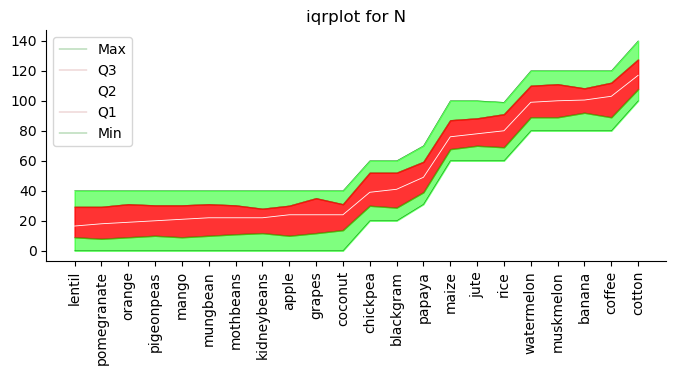

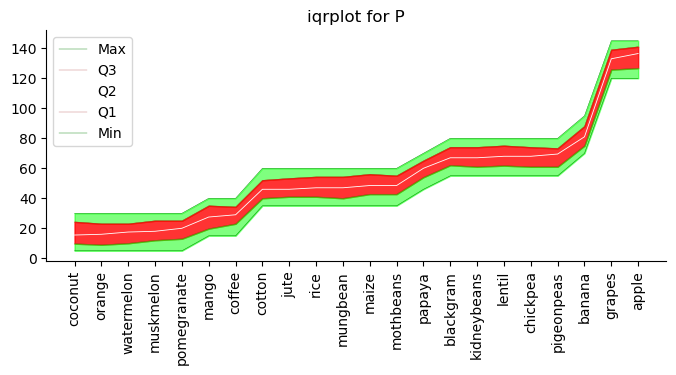

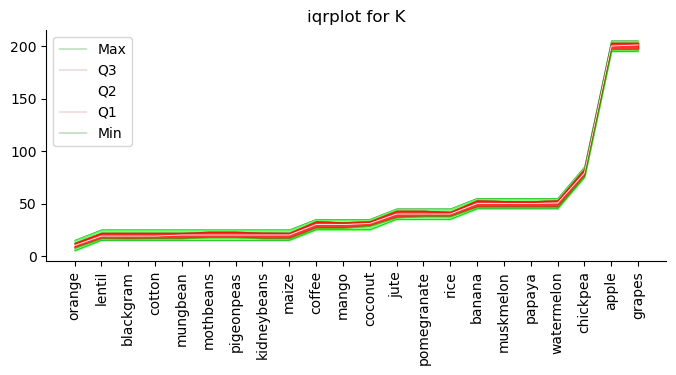

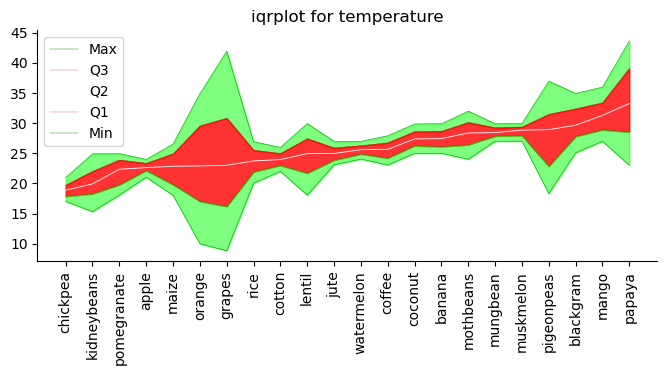

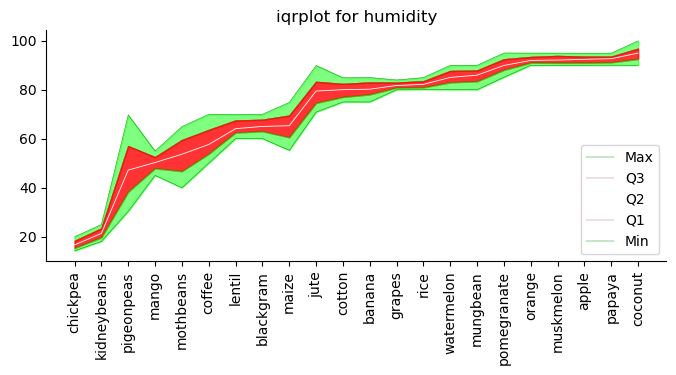

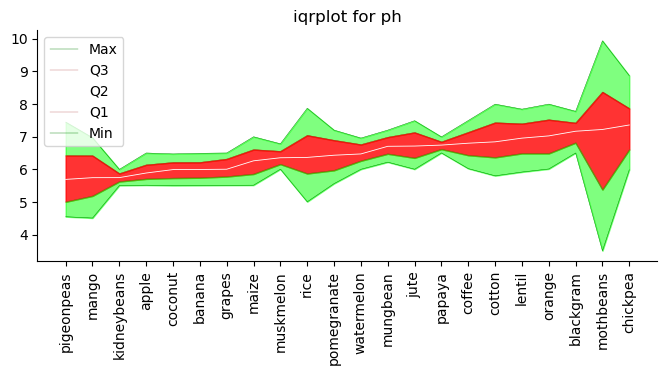

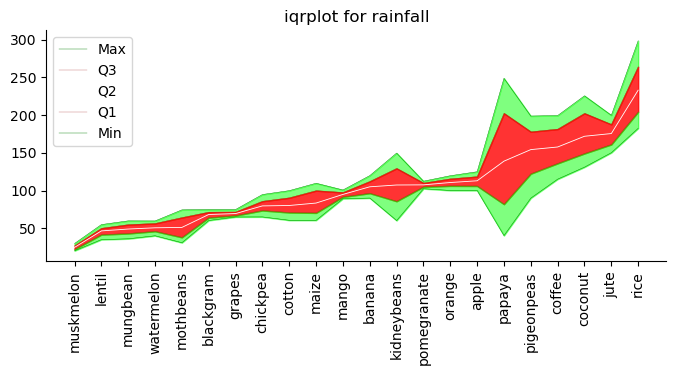

In [64]:
# iqrplot visualizations for all input features
for feature in df.columns[:-1]:

    iqrplot(df, feature)


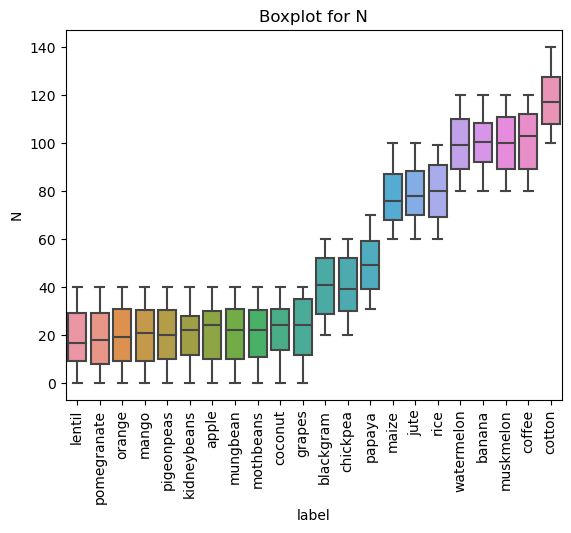

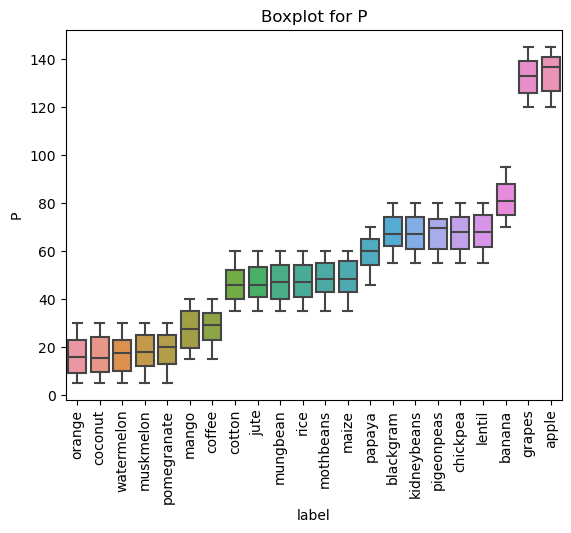

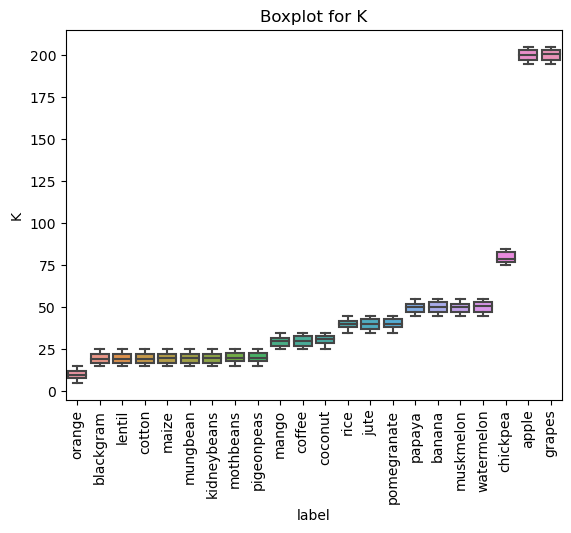

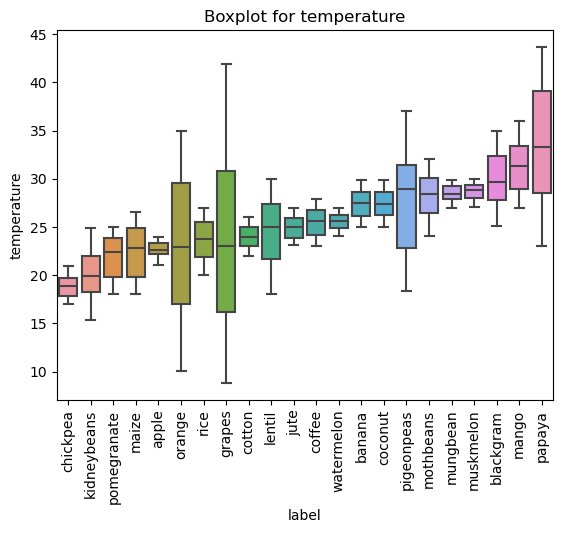

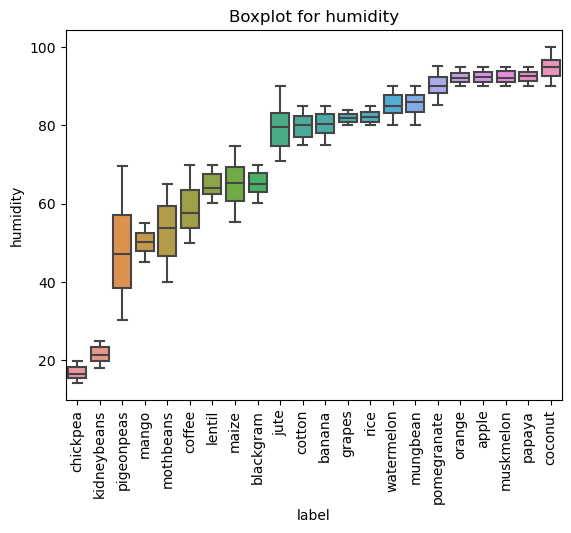

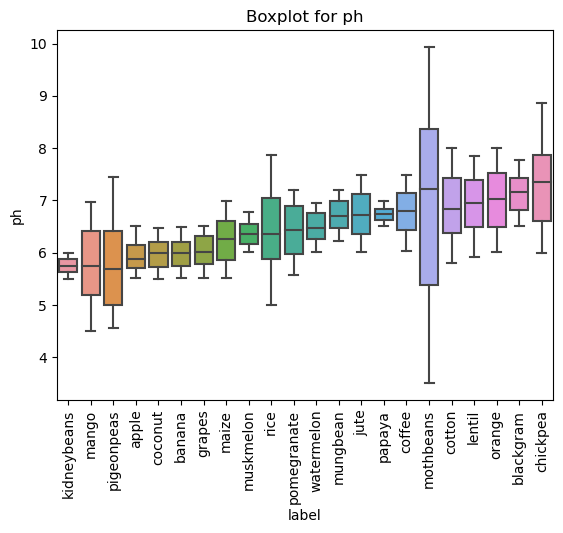

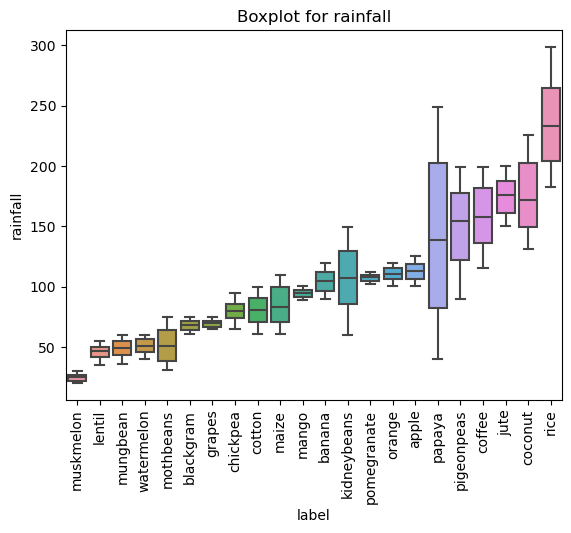

In [129]:
# cropwise boxplot visualization for all input features
for col in df.columns[:-1]:
    plt.figure()
    plt.title("Boxplot for "+str(col))
    sns.boxplot(data=df, x="label", y=col, order=df.groupby('label').agg({col:np.mean}).sort_values(by=col).index)
    for i in plt.gca().get_xticklabels():
        i.set_rotation(90)
    plt.show()

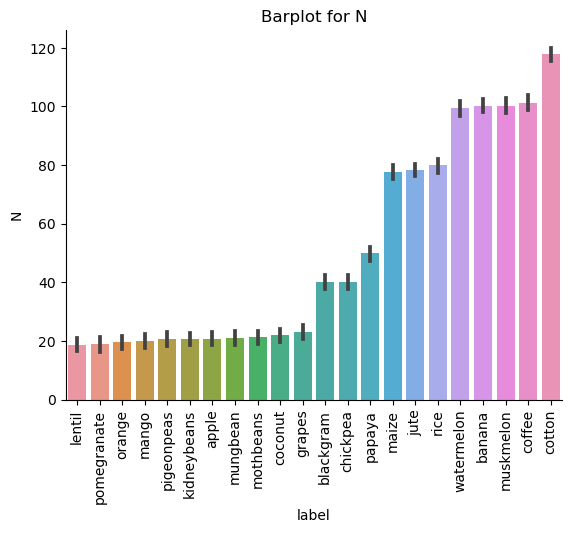

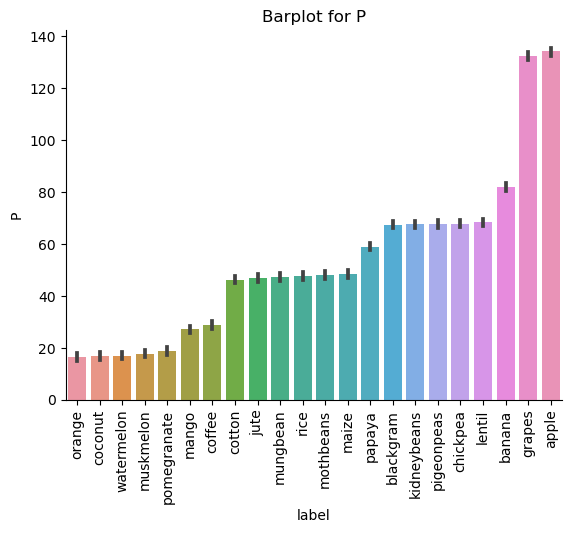

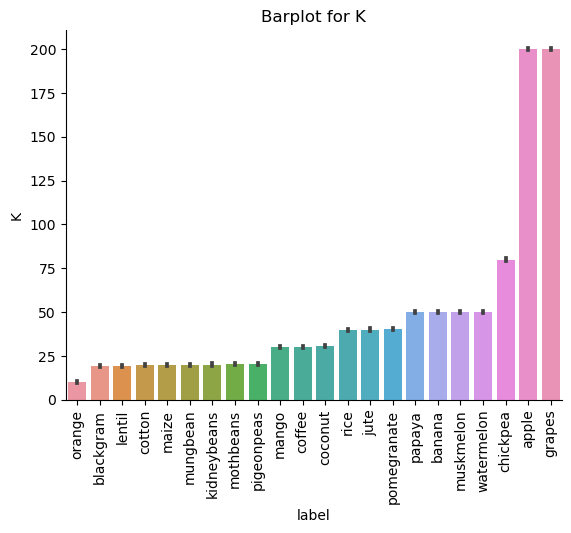

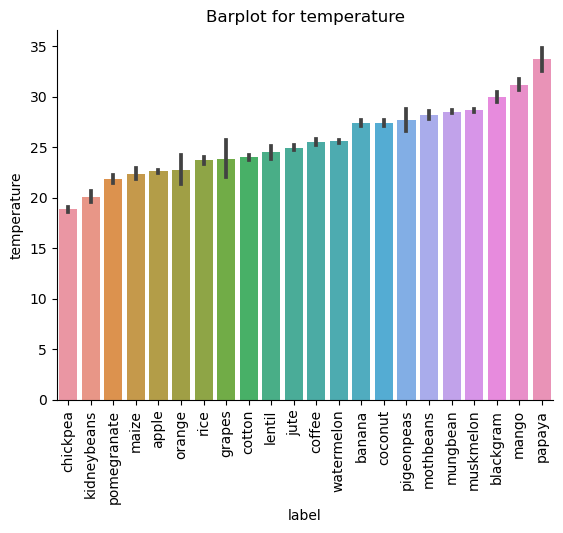

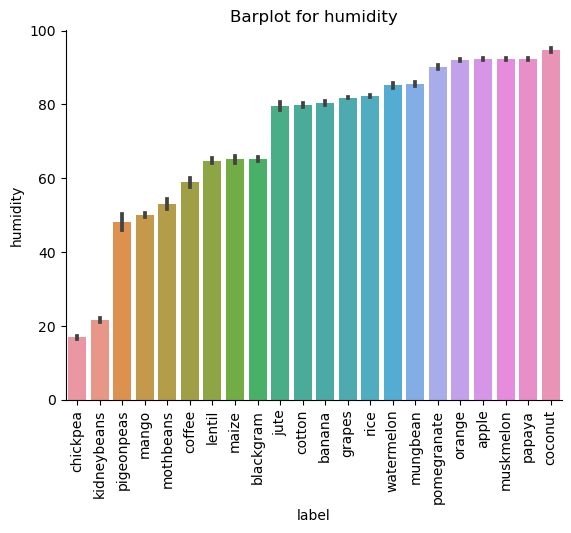

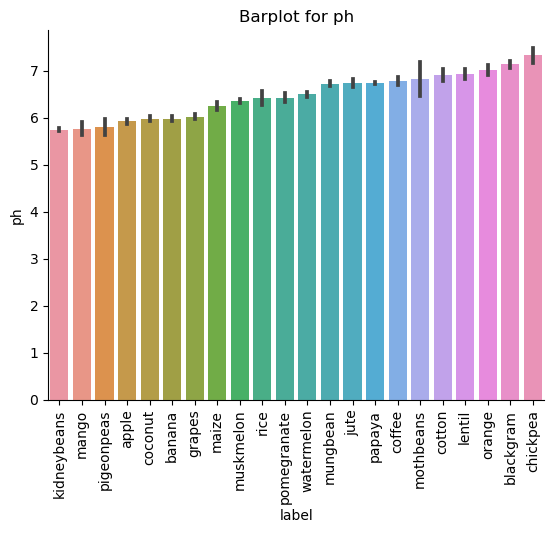

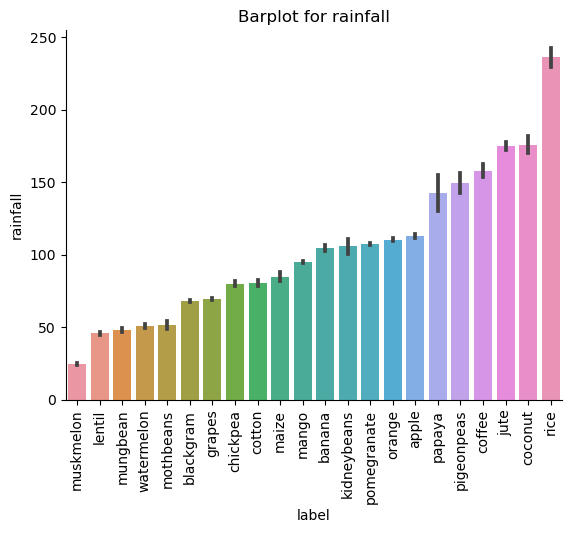

In [131]:
# featurewise barplot visualization for mean of each crop
for col in df.columns[:-1]:
    plt.figure()
    plt.title("Barplot for "+str(col))
    sns.barplot(data=df, x="label", y=col, order=df.groupby('label').agg({col:np.mean}).sort_values(by=col).index)
    for i in plt.gca().get_xticklabels():
        i.set_rotation(90)
    temp=0
    
    for i in plt.gca().spines.values():
        if(temp==1 or temp==3):
            i.set_visible(False)
        temp+=1
    plt.show()
    

### Conclusion:
#### From all the visualizations, it is observed that each crop is clustered in certain intervals.
#### A piece-wise defined linear classifier like a decision tree or a random forest is more suitable for this data.

# END

# ______________________________________________________________